In [6]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, linspace, pi, sqrt
from opensees import uniaxial
from opensees.units.english import ksi, psi, inch, ft

plt.style.use("berkeley")

In [7]:
Fy = 66.8*ksi          # STEEL yield stress
Es = 29000.*ksi        # modulus of steel
Bs = 0.005             # strain-hardening ratio 
R0 = 18                # control the transition from elastic to plastic branches
cR1 = 0.925            # control the transition from elastic to plastic branches
cR2 = 0.15             # control the transition from elastic to plastic branches

In [8]:
# nominal concrete compressive strength
fc = -8.5*ksi              # CONCRETE Compressive Strength ksi   (+Tension -Compression)
Ec = 57*ksi*sqrt(-fc/psi)  # Concrete Elastic Modulus
# unconfined concrete
fc1U = fc                  # UNCONFINED concrete (todeschini parabolic model) maximum stress
eps1U = -0.003             # strain at maximum strength of unconfined concrete
fc2U = 0.2*fc1U            # ultimate stress
eps2U = -0.01              # strain at ultimate stress
_lambda = 0.1              # ratio between unloading slope at eps2 and initial slope Ec
# tensile-strength properties
ftU = -0.14*fc1U           # tensile strength +tension
Ets = ftU/0.002            # tension softening stiffness

In [9]:
concU = uniaxial.Concrete02(1, fc1U, eps1U, fc2U, eps2U, _lambda, ftU, Ets) # build cover, concrete (unconfined)
reinf = uniaxial.Steel02(None, Fy, Es, Bs, R0, cR1, cR2)                    # build 'reinforcement material

Text(0, 0.5, '$\\sigma$')

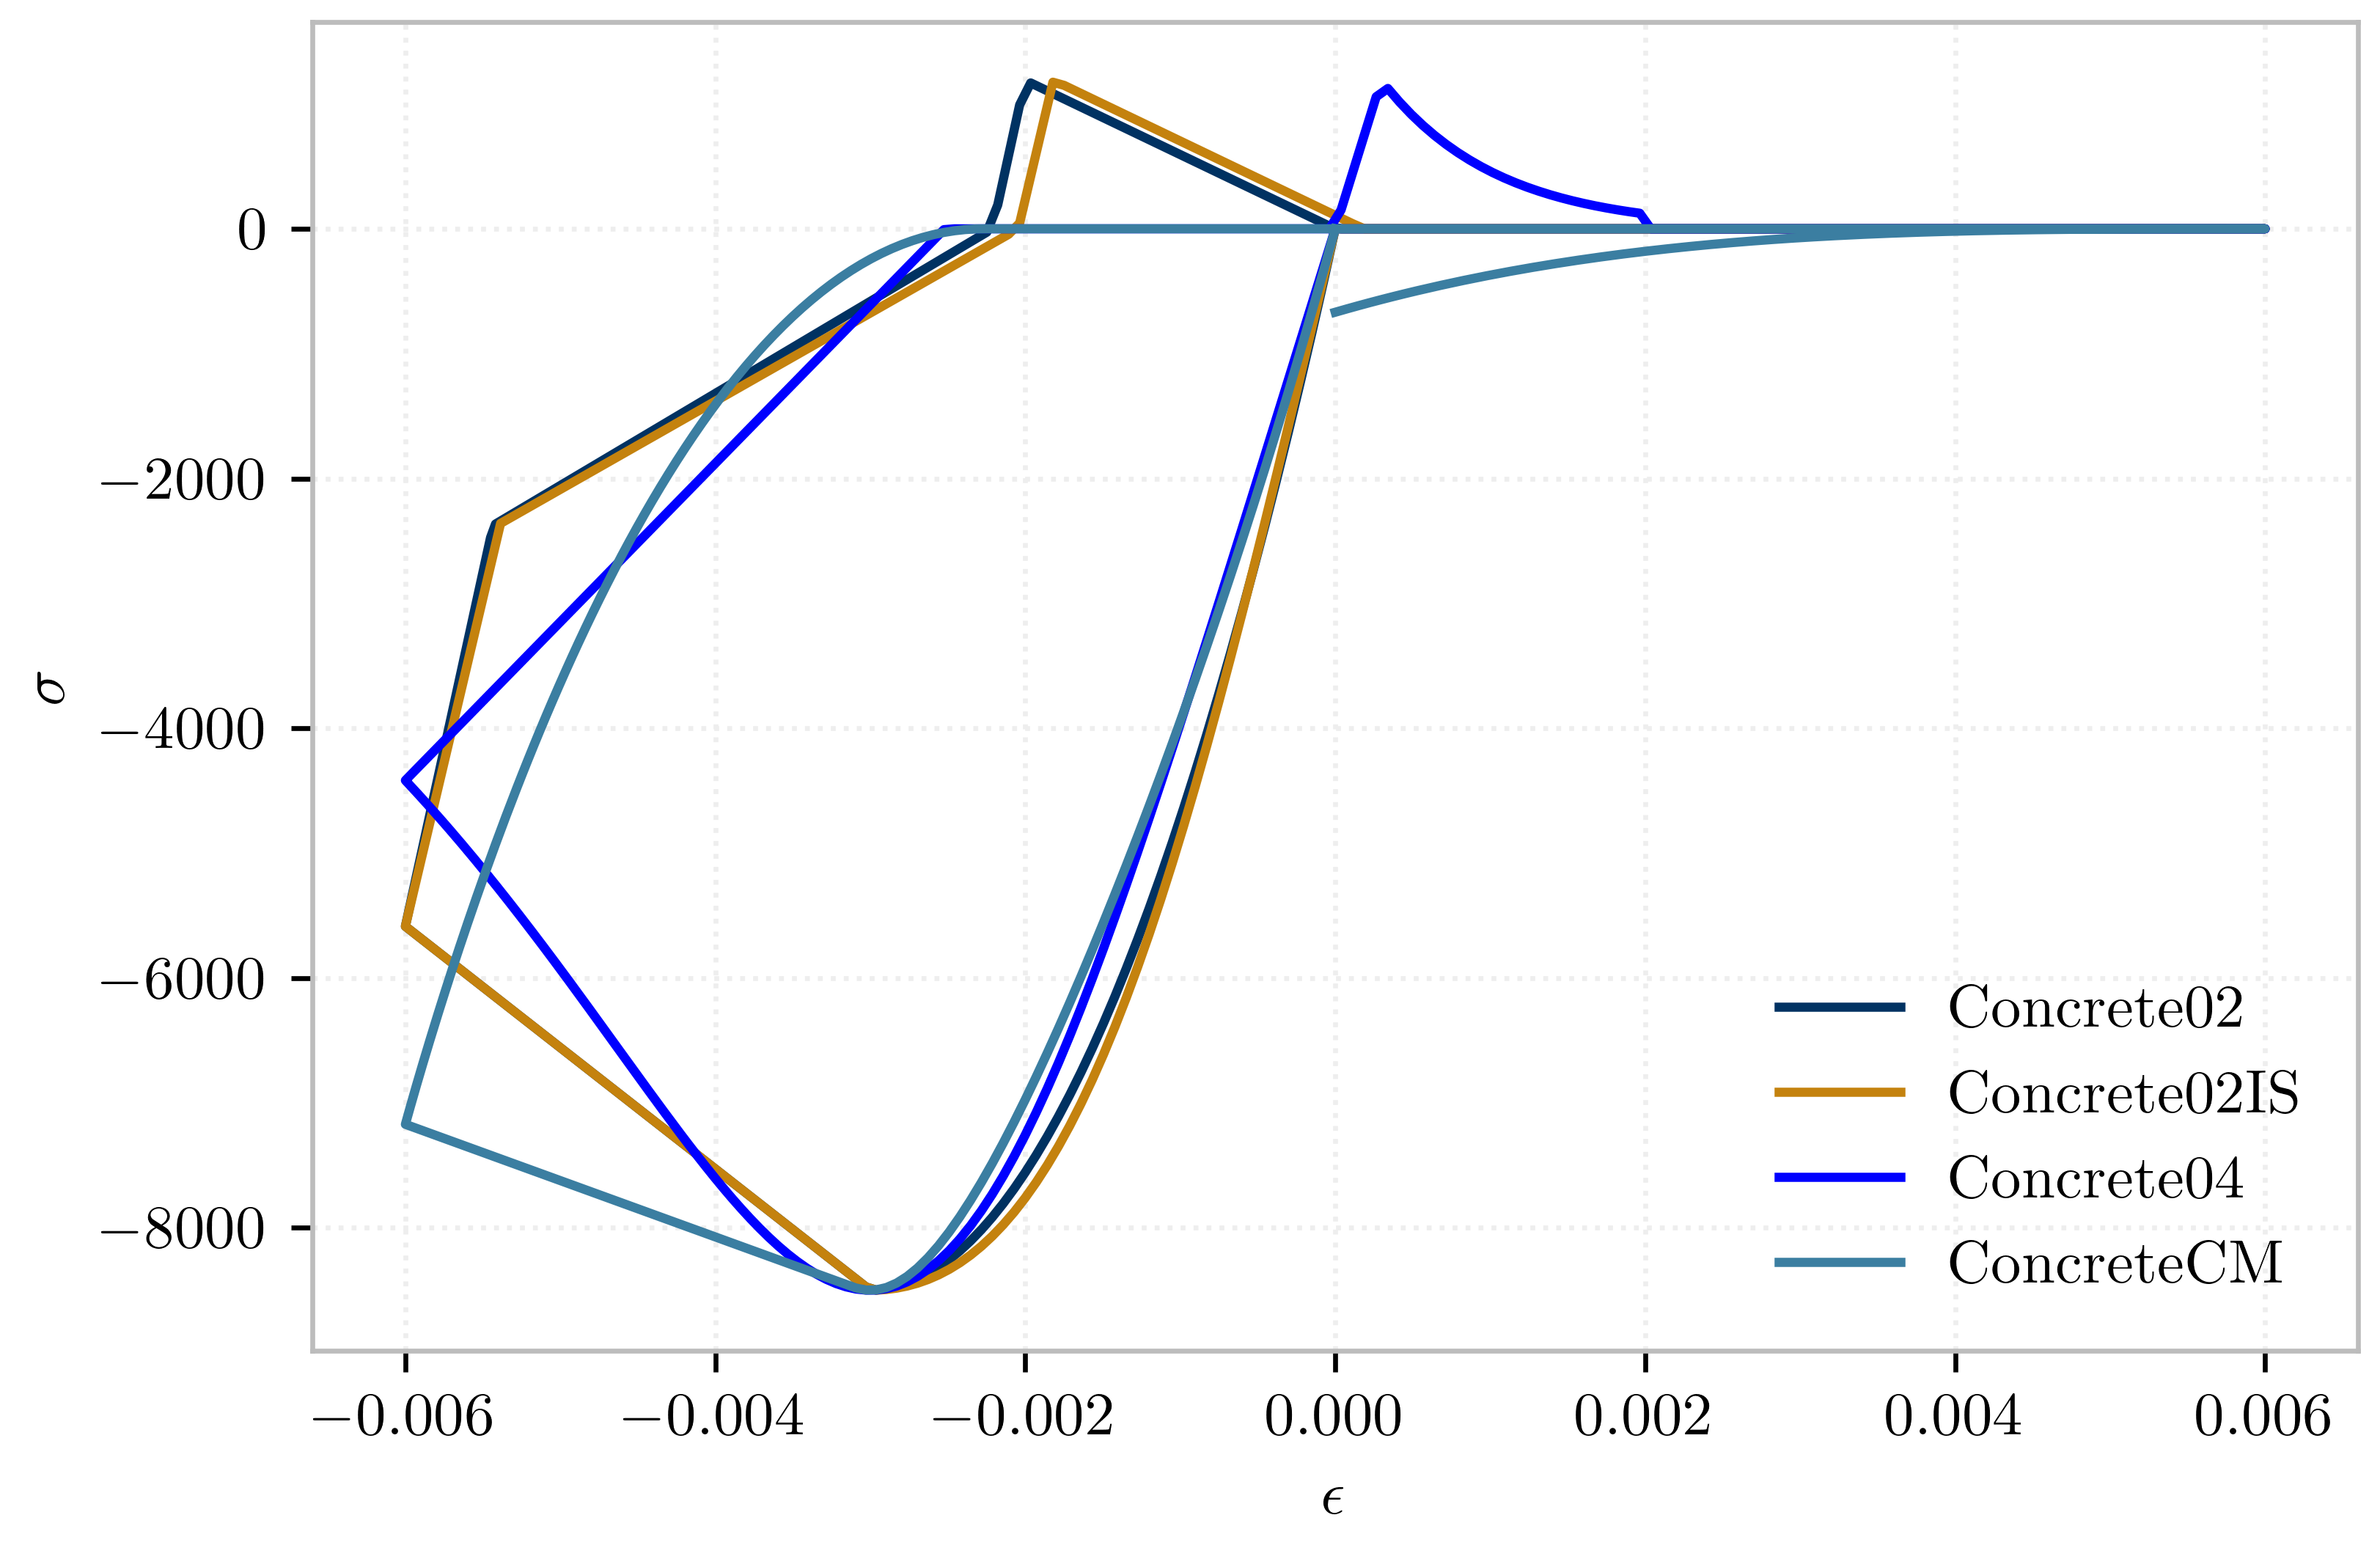

In [12]:
strain  = -0.006*sin(linspace(0, 2*pi, 500))
fig, ax = plt.subplots()

with uniaxial.Concrete02(1, fc1U, eps1U, fc2U, eps2U, _lambda, ftU, Ets) as c:
    ax.plot(strain, [c.getStress(e, commit=True) for e in strain], label="Concrete02")
    
with uniaxial.Concrete02IS(1, Ec, fc1U, eps1U, fc2U, eps2U, [_lambda, ftU, Ets]) as conc:
    ax.plot(strain, [conc.getStress(e, commit=True) for e in strain], label="Concrete02IS")

with uniaxial.Concrete04(1, fc1U, eps1U, eps2U, 4e3*ksi, [ftU, ftU/Ets]) as conc:
    ax.plot(strain, [conc.getStress(e, commit=True) for e in strain], label="Concrete04")

with uniaxial.ConcreteCM( 1, fc1U, eps1U, 4500*ksi, 7, 1.035, 0.30, 0.00008, 1.2, 10000) as conc:
    ax.plot(strain, [conc.getStress(e, commit=True) for e in strain], label="ConcreteCM")

ax.legend()
ax.set_xlabel(r"$\epsilon$")
ax.set_ylabel(r"$\sigma$")

In [11]:
# strain =  -np.linspace(0, 0.005, 100)

# import pandas
# ax = pandas.read_csv("stressStrain.csv", names=["strain", "stress"]).plot("strain", "stress", marker=".", label="test")

# with uniaxial.Concrete02IS(1, 5e3*ksi, fc1U, eps1U, fc2U, eps2U, [_lambda, ftU, Ets]) as conc:
#     ax.plot(-strain, [-conc.getStress(e, commit=True) for e in strain], label="Concrete02IS")

# with concU as c:
#     stress = [-c.getStress(e, commit=True) for e in strain]
#     ax.plot(-strain, stress, label="Concrete02")

# with uniaxial.Concrete04(1, fc1U, eps1U, eps2U, 4e3*ksi, [ftU, ftU/Ets]) as conc:
#     ax.plot(-strain, [-conc.getStress(e, commit=True) for e in strain], label="Concrete04")

# ax.legend()
# ax.set_xlabel(r"$\epsilon$")
# ax.set_ylabel(r"$\sigma$");